### ÎùºÏù¥Î∏åÎü¨Î¶¨ import & ÌååÏùº Îã§Ïö¥Î°úÎìú

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json

In [3]:
file_path = "1107_Youtube_Trending_Dataset/"
file_name = "KR_youtube_trending_data.csv"

In [18]:
df = pd.read_csv(file_path + file_name)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233754 entries, 0 to 233753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233754 non-null  object
 1   title              233754 non-null  object
 2   publishedAt        233754 non-null  object
 3   channelId          233754 non-null  object
 4   channelTitle       233754 non-null  object
 5   categoryId         233754 non-null  int64 
 6   trending_date      233754 non-null  object
 7   tags               233754 non-null  object
 8   view_count         233754 non-null  int64 
 9   likes              233754 non-null  int64 
 10  dislikes           233754 non-null  int64 
 11  comment_count      233754 non-null  int64 
 12  thumbnail_link     233754 non-null  object
 13  comments_disabled  233754 non-null  bool  
 14  ratings_disabled   233754 non-null  bool  
 15  description        229291 non-null  object
dtypes: bool(2), int64(5)

In [5]:
category_file = "KR_category_id.json"

with open(file_path + category_file, 'r', encoding = 'utf-8') as file:
    category_dict = json.load(file)

In [6]:
category_dict = category_dict['items']

In [7]:
category_mapping = dict()

for item in category_dict:
    try:
        category_mapping[int(item['id'])] = item['snippet']['title']
    except:
        category_mapping[int(item['id'])] = ''

category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233754 entries, 0 to 233753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233754 non-null  object
 1   title              233754 non-null  object
 2   publishedAt        233754 non-null  object
 3   channelId          233754 non-null  object
 4   channelTitle       233754 non-null  object
 5   categoryId         233754 non-null  int64 
 6   trending_date      233754 non-null  object
 7   tags               233754 non-null  object
 8   view_count         233754 non-null  int64 
 9   likes              233754 non-null  int64 
 10  dislikes           233754 non-null  int64 
 11  comment_count      233754 non-null  int64 
 12  thumbnail_link     233754 non-null  object
 13  comments_disabled  233754 non-null  bool  
 14  ratings_disabled   233754 non-null  bool  
 15  description        229291 non-null  object
dtypes: bool(2), int64(5)

### df Ï†ÑÏ≤òÎ¶¨

In [9]:
def clean_trending_date(date):
    date = date[:10]
    date = date.replace('-', '')
    return int(date[2:])


def split_tag(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"', '').split('|')


def preprocess_df(df):
    df['trending_date'] = df['trending_date'].apply(clean_trending_date)
    df['tags'] = df['tags'].apply(split_tag)

### Ï§ëÎ≥µ ÏòÅÏÉÅ Ï†úÍ±∞ df ÏÉùÏÑ± (Í∞ÄÏû• Îπ†Î•∏ ÎÇ†Ïßú Í∏∞Ï§Ä)

In [21]:
unique_df = df.sort_values('trending_date', ascending = True)
unique_df = df.drop_duplicates(subset = 'video_id', keep = 'first')

In [22]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25581 entries, 0 to 233621
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           25581 non-null  object
 1   title              25581 non-null  object
 2   publishedAt        25581 non-null  object
 3   channelId          25581 non-null  object
 4   channelTitle       25581 non-null  object
 5   categoryId         25581 non-null  int64 
 6   trending_date      25581 non-null  object
 7   tags               25581 non-null  object
 8   view_count         25581 non-null  int64 
 9   likes              25581 non-null  int64 
 10  dislikes           25581 non-null  int64 
 11  comment_count      25581 non-null  int64 
 12  thumbnail_link     25581 non-null  object
 13  comments_disabled  25581 non-null  bool  
 14  ratings_disabled   25581 non-null  bool  
 15  description        25037 non-null  object
dtypes: bool(2), int64(5), object(9)
memory usage

230812 ~ 231107 Í∏∞Ï§Ä

233754 Í∞úÏóêÏÑú 25581 Í∞úÎ°ú Ï§ÑÏóàÏùå. (ÏïΩ 10ÌçºÏÑºÌä∏) -> ???Í∑∏Îü¥ÏàòÏûàÎÇò?

In [26]:
25581/233754

0.10943556046099746

In [33]:
preprocess_df(unique_df)

C:\Users\kjsoo\AppData\Local\Temp\ipykernel_10636\3505363311.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = df['trending_date'].apply(clean_trending_date)
C:\Users\kjsoo\AppData\Local\Temp\ipykernel_10636\3505363311.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(split_tag)


In [34]:
unique_df

video_id                                              title  \
0       uq5LClQN3cE                                        ÏïàÎÖïÌïòÏÑ∏Ïöî Î≥¥Í≤∏ÏûÖÎãàÎã§   
1       I-ZbZCHsHD0                                 Î∂ÄÎùΩÌÜ†Ïä§Ïùò Í≥ÑÌöç [Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ]   
2       9d7jNUjBoss                                    ÌèâÏÉù Î∞òÏÑ±ÌïòÎ©¥ÏÑú ÏÇ¥Í≤†ÏäµÎãàÎã§.   
3       3pI_L3-sMVg                               ·Ñã·Ö°·Ü´·ÑÇ·Öß·Üº·Ñí·Ö°·Ñâ·Ö¶·Ñã·Ö≠ ÍΩàÎöúÎ£πÏûÖÎãàÎã§.   
4       zrsBjYukE8s   Î∞ïÏßÑÏòÅ (J.Y. Park) When We Disco (Duet with ÏÑ†ÎØ∏) M/V   
...             ...                                                ...   
233590  mwKJfNYwvm8                        I Built 100 Wells In Africa   
233605  4Y05XXdOwbo                              [ÌòπÏÑ±ÌÉàÏ∂ú: ÏÉàÎ°úÏö¥ ÏãúÎåÄ] Ìã∞Ï†Ä ÏòàÍ≥†Ìé∏   
233611  iklotj8e9FI  [ENG] 231011 miniÌïëÍ≥ÑÍ≥† : Ïú†Ïû¨ÏÑù, Ï°∞ÏÑ∏Ìò∏, Î∞ïÎ≥¥ÏòÅ @Îú¨Îú¨Ìé∏ÏßëÏã§ (O...   
233612  X8vfOo_MUSc  ‚≠êDÏ¶àÎãà Ïó≠ÏÇ¨ÏÉÅ Ï≤òÏùå‚≠ê Î™®ÎëêÎ•º ÍπúÏßù ÎÜÄÎùºÍ≤å Ìïú ÏïàÎÇòÏùò Îì±Ïû•! 19Ìò∏ Í∞ÄÏàòÏùò 'Í∞ôÏù¥ ...   
233621  St4QcYPriC4  ÎØ∏Íµ≠ÏóêÏÑú Î∞ïÏßÑÏòÅXÎ∞©ÏãúÌòÅ ÏûêÍ∏∞Îãò Î∂ÄÎ∂Ä(?)Ïã∏ÏõÄ ÌõÑ Í∞ÄÏ∂ú!? Ï†ÑÏÑ§Ïùò 'ÏñëÎßê ÏÇ¨Í±¥'#Ïú†ÌÄ¥...   

                 publishedAt                 channelId  \
0       2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw   
1       2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA   
2       2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ   
3       2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w   
4       2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg   
...                      ...                       ...   
233590  2023-11-04T16:00:00Z  UCX6OQ3DkcsbYNE6H8uQQuVA   
233605  2023-11-02T15:45:23Z  UCmtjEZ9fXPph2RiAvStIjPg   
233611  2023-11-03T03:00:31Z  UCDNvRZRgvkBTUkQzFoT_8rA   
233612  2023-11-02T15:32:15Z  UCF3UEVPt5zZTlBVJwDG317g   
233621  2023-11-02T12:49:38Z  UC920m3pMPH45qztdhppZhwA   

                      channelTitle  categoryId  trending_date  \
0                            Î≥¥Í≤∏ BK          24         200812   
1                              Ï¥ùÎ™áÎ™Ö           1         200812   
2                      ÏñëÌå° YangPang          22         200812   
3                    ÍΩàÎöúÎ£π Quaddurup          24         200812   
4                JYP Entertainment          10         200812   
...                            ...         ...            ...   
233590                     MrBeast          24         231107   
233605  20th Century Studios Korea           1         231107   
233611               Îú¨Îú¨ DdeunDdeun          23         231107   
233612                 JTBC Voyage          24         231107   
233621                 Ïú† ÌÄ¥Ï¶à Ïò® Îçî ÌäúÎ∏å          24         231107   

                                                     tags  view_count  \
0                                            [Î≥¥Í≤∏, bokyem]     5947503   
1              [Ï¥ùÎ™áÎ™Ö, Ïû¨Î∞åÎäî ÎßåÌôî, Î∂ÄÎùΩÌÜ†Ïä§, Î£®ÏãúÌçº, Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ, Ï¥ùÎ™áÎ™Ö Ïä§ÌÜ†Î¶¨]      963384   
2       [ÏñëÌå°, ÏñëÌå°Ïú†ÌäúÎ∏å, Ìå°ÌäúÎ∏å, Í∞ÄÏ°±ÏãúÌä∏ÏΩ§, ÏñëÌå°Í∞ÄÏ°±, ÏñëÌå°Í∞ÄÏ°±ÏãúÌä∏ÏΩ§, ÏñëÌå°Ïñ∏Îãà, ÌòÑ...     2950885   
3       [ÍΩàÎöúÎ£π, ÌïúÍµ≠Ïó¨ÌñâÍ∏∞, quaddurup, ÎöúÎ£πÏù¥, korea, southkorea...     1743374   
4       [jyp entertainment, jyp, j.y.park, jypark, Î∞ïÏßÑÏòÅ...     3433885   
...                                                   ...         ...   
233590                                           [[none]]    58401686   
233605                                           [[none]]     1012542   
233611  [Îú¨Îú¨, ÌïëÍ≥ÑÍ≥†, Ïú†Ïû¨ÏÑù, Î∞ïÎ≥¥ÏòÅ, Ï°∞ÏÑ∏Ìò∏, Ï†ïÏã†Î≥ëÎèôÏóêÎèÑÏïÑÏπ®Ïù¥ÏôÄÏöî, ÎìúÎùºÎßàÏ∂îÏ≤ú, ÎÑ∑...     1899716   
233612  [genre:Ïò§ÎîîÏÖò, format:ÌÅêÎ†àÏù¥ÏÖò, source:ÏùåÏïÖ, type:Î∞©ÏÜ°, s...     1545029   
233621  [cj100, Î∞ïÏßÑÏòÅ, Î∞©ÏãúÌòÅ, Ïä¨Î¶≠Î∞±, Ïú†Ïû¨ÏÑù, Ïú†ÌÄ¥Ï¶à, Ïú†ÌÄ¥Ï¶àÏò®ÎçîÎ∏îÎü≠, Ïù¥Ìö®Ï≤†,...      576791   

          likes  dislikes  comment_count  \
0         53326    105756         139946   
1         28244       494           3339   
2         17974     6

### ÎπÑÎîîÏò§ Î≥ÑÎ°ú Trend date Í∞íÏùÑ listÎ°ú Î™®ÏùÄ ÎîïÏÖîÎÑàÎ¶¨ ( { video_id : [ trend_date ] }) 

In [23]:
date_dict = {}

for idx, date in zip(df['video_id'], df['trending_date']):
    if idx in date_dict:
        date_dict[idx].append(date[:10])
    else:
        date_dict[idx] = [date[:10]]

cnt = 0
for key, value in date_dict.items():
    cnt += 1
    print(f"{key}  {value}")
    if cnt == 10: break

uq5LClQN3cE  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
I-ZbZCHsHD0  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16']
9d7jNUjBoss  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
3pI_L3-sMVg  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
zrsBjYukE8s  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19']
jbGRowa5tIk  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
X-TPQPEyRGo  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
REUA4roJndU  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
7FOi40uehC4  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16']
0dsnm3n6ZdM  ['2020-08-12', '2020-

In [95]:
tmp = pd.DataFrame(list(date_dict.items()), columns = ['video_id', 'trending_date_list'])
unique_df_trending_date_list = pd.merge(unique_df, tmp, on='video_id', how='left')

In [96]:
unique_df_trending_date_list.head(5)

video_id                                             title  \
0  uq5LClQN3cE                                       ÏïàÎÖïÌïòÏÑ∏Ïöî Î≥¥Í≤∏ÏûÖÎãàÎã§   
1  I-ZbZCHsHD0                                Î∂ÄÎùΩÌÜ†Ïä§Ïùò Í≥ÑÌöç [Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ]   
2  9d7jNUjBoss                                   ÌèâÏÉù Î∞òÏÑ±ÌïòÎ©¥ÏÑú ÏÇ¥Í≤†ÏäµÎãàÎã§.   
3  3pI_L3-sMVg                              ·Ñã·Ö°·Ü´·ÑÇ·Öß·Üº·Ñí·Ö°·Ñâ·Ö¶·Ñã·Ö≠ ÍΩàÎöúÎ£πÏûÖÎãàÎã§.   
4  zrsBjYukE8s  Î∞ïÏßÑÏòÅ (J.Y. Park) When We Disco (Duet with ÏÑ†ÎØ∏) M/V   

            publishedAt                 channelId       channelTitle  \
0  2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw              Î≥¥Í≤∏ BK   
1  2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA                Ï¥ùÎ™áÎ™Ö   
2  2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ        ÏñëÌå° YangPang   
3  2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w      ÍΩàÎöúÎ£π Quaddurup   
4  2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg  JYP Entertainment   

   categoryId         trending_date  \
0          24  2020-08-12T00:00:00Z   
1           1  2020-08-12T00:00:00Z   
2          22  2020-08-12T00:00:00Z   
3          24  2020-08-12T00:00:00Z   
4          10  2020-08-12T00:00:00Z   

                                                tags  view_count   likes  \
0                                          Î≥¥Í≤∏|bokyem     5947503   53326   
1                Ï¥ùÎ™áÎ™Ö|Ïû¨Î∞åÎäî ÎßåÌôî|Î∂ÄÎùΩÌÜ†Ïä§|Î£®ÏãúÌçº|Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ|Ï¥ùÎ™áÎ™Ö Ïä§ÌÜ†Î¶¨      963384   28244   
2  ÏñëÌå°|ÏñëÌå°Ïú†ÌäúÎ∏å|Ìå°ÌäúÎ∏å|Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Í∞ÄÏ°±|ÏñëÌå°Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Ïñ∏Îãà|ÌòÑÏã§ÎÇ®Îß§|ÌòÑÏã§ÏûêÎß§...     2950885   17974   
3  ÍΩàÎöúÎ£π|ÌïúÍµ≠Ïó¨ÌñâÍ∏∞|quaddurup|ÎöúÎ£πÏù¥|korea|southkorea|vlog|...     1743374   36893   
4  JYP Entertainment|JYP|J.Y.Park|JYPark|Î∞ïÏßÑÏòÅ|ÏÑ†ÎØ∏|S...     3433885  353337   

   dislikes  comment_count                                  thumbnail_link  \
0    105756         139946  https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg   
1       494           3339  https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg   
2     68898          50688  https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg   
3      1798           8751  https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg   
4      9763          23405  https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg   

   comments_disabled  ratings_disabled  \
0              False             False   
1              False             False   
2              False             False   
3              False             False   
4              False             False   

                                         description  \
0                                                NaN   
1  Ïò§ÎäòÎèÑ Ï†ïÎßê Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§!!Ï¥ùÎ™áÎ™Ö Ïä§ÌäúÎîîÏò§ - Ï¥ùÎ™áÎ™Ö, Ïã≠Ï†úÍ≥±, 5GÎØº, MOVEÌòÅ...   
2                                                NaN   
3                ÏïûÏúºÎ°ú Ï¢Ä Îçî ÍπîÎÅîÌïú ÏòÅÏÉÅÏ†úÏûë ÏïΩÏÜç ÎìúÎ¶¨Í≤†ÏäµÎãàÎã§.Îäò Í∞êÏÇ¨ÎìúÎ¶ΩÎãàÎã§   
4  MelOn http://kko.to/TWyXd7zYjSpotify https://s...   

                                  trending_date_list  
0  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
1  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
2  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
3  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
4  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...

In [97]:
unique_list_df = unique_df_trending_date_list.drop(['channelId', 'trending_date', 'tags', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'description'], axis=1)

unique_list_df.head(5)

video_id                                             title  \
0  uq5LClQN3cE                                       ÏïàÎÖïÌïòÏÑ∏Ïöî Î≥¥Í≤∏ÏûÖÎãàÎã§   
1  I-ZbZCHsHD0                                Î∂ÄÎùΩÌÜ†Ïä§Ïùò Í≥ÑÌöç [Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ]   
2  9d7jNUjBoss                                   ÌèâÏÉù Î∞òÏÑ±ÌïòÎ©¥ÏÑú ÏÇ¥Í≤†ÏäµÎãàÎã§.   
3  3pI_L3-sMVg                              ·Ñã·Ö°·Ü´·ÑÇ·Öß·Üº·Ñí·Ö°·Ñâ·Ö¶·Ñã·Ö≠ ÍΩàÎöúÎ£πÏûÖÎãàÎã§.   
4  zrsBjYukE8s  Î∞ïÏßÑÏòÅ (J.Y. Park) When We Disco (Duet with ÏÑ†ÎØ∏) M/V   

            publishedAt       channelTitle  categoryId  view_count  \
0  2020-08-09T09:32:48Z              Î≥¥Í≤∏ BK          24     5947503   
1  2020-08-12T09:00:08Z                Ï¥ùÎ™áÎ™Ö           1      963384   
2  2020-08-10T09:54:13Z        ÏñëÌå° YangPang          22     2950885   
3  2020-08-11T15:00:58Z      ÍΩàÎöúÎ£π Quaddurup          24     1743374   
4  2020-08-11T09:00:13Z  JYP Entertainment          10     3433885   

                                   thumbnail_link  \
0  https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg   
1  https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg   
2  https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg   
3  https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg   
4  https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg   

                                  trending_date_list  
0  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
1  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
2  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
3  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...  
4  [2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1...

In [100]:
unique_list_df['trending_date_list'].describe()

count            25581
unique           14273
top       [2020-08-12]
freq                34
Name: trending_date_list, dtype: object

In [101]:
# unique_list_df.to_csv('unique_list_df.csv', index=False)

In [102]:
# unique_df_trending_date_list.to_csv('unique_df_trending_date_list.csv', index = False)

In [103]:
unique_df_trending_date_list

video_id  \
0      uq5LClQN3cE   
1      I-ZbZCHsHD0   
2      9d7jNUjBoss   
3      3pI_L3-sMVg   
4      zrsBjYukE8s   
...            ...   
25576  mwKJfNYwvm8   
25577  4Y05XXdOwbo   
25578  iklotj8e9FI   
25579  X8vfOo_MUSc   
25580  St4QcYPriC4   

                                                                                                    title  \
0                                                                                             ÏïàÎÖïÌïòÏÑ∏Ïöî Î≥¥Í≤∏ÏûÖÎãàÎã§   
1                                                                                      Î∂ÄÎùΩÌÜ†Ïä§Ïùò Í≥ÑÌöç [Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ]   
2                                                                                         ÌèâÏÉù Î∞òÏÑ±ÌïòÎ©¥ÏÑú ÏÇ¥Í≤†ÏäµÎãàÎã§.   
3                                                                                    ·Ñã·Ö°·Ü´·ÑÇ·Öß·Üº·Ñí·Ö°·Ñâ·Ö¶·Ñã·Ö≠ ÍΩàÎöúÎ£πÏûÖÎãàÎã§.   
4                                                        Î∞ïÏßÑÏòÅ (J.Y. Park) When We Disco (Duet with ÏÑ†ÎØ∏) M/V   
...                                                                                                   ...   
25576                                                                         I Built 100 Wells In Africa   
25577                                                                               [ÌòπÏÑ±ÌÉàÏ∂ú: ÏÉàÎ°úÏö¥ ÏãúÎåÄ] Ìã∞Ï†Ä ÏòàÍ≥†Ìé∏   
25578                                                [ENG] 231011 miniÌïëÍ≥ÑÍ≥† : Ïú†Ïû¨ÏÑù, Ï°∞ÏÑ∏Ìò∏, Î∞ïÎ≥¥ÏòÅ @Îú¨Îú¨Ìé∏ÏßëÏã§ (OneCam)   
25579            ‚≠êDÏ¶àÎãà Ïó≠ÏÇ¨ÏÉÅ Ï≤òÏùå‚≠ê Î™®ÎëêÎ•º ÍπúÏßù ÎÜÄÎùºÍ≤å Ìïú ÏïàÎÇòÏùò Îì±Ïû•! 19Ìò∏ Í∞ÄÏàòÏùò 'Í∞ôÏù¥ ÎààÏÇ¨Îûå ÎßåÎì§Îûò?(Í≤®Ïö∏ÏôïÍµ≠ OST)'ÔΩúÏã±Ïñ¥Í≤åÏù∏3ÔΩúJTBC 231102 Î∞©ÏÜ° Ïô∏   
25580  ÎØ∏Íµ≠ÏóêÏÑú Î∞ïÏßÑÏòÅXÎ∞©ÏãúÌòÅ ÏûêÍ∏∞Îãò Î∂ÄÎ∂Ä(?)Ïã∏ÏõÄ ÌõÑ Í∞ÄÏ∂ú!? Ï†ÑÏÑ§Ïùò 'ÏñëÎßê ÏÇ¨Í±¥'#Ïú†ÌÄ¥Ï¶àÏò®ÎçîÎ∏îÎü≠ | YOU QUIZ ON THE BLOCK EP.217 | tvN 231101 Î∞©ÏÜ°   

                publishedAt                 channelId  \
0      2020-08-09T09:32:48Z  UCu9BCtGIEr73LXZsKmoujKw   
1      2020-08-12T09:00:08Z  UCRuSxVu4iqTK5kCh90ntAgA   
2      2020-08-10T09:54:13Z  UCMVC92EOs9yDJG5JS-CMesQ   
3      2020-08-11T15:00:58Z  UCkQCwnkQfgSuPTTnw_Y7v7w   
4      2020-08-11T09:00:13Z  UCaO6TYtlC8U5ttz62hTrZgg   
...                     ...                       ...   
25576  2023-11-04T16:00:00Z  UCX6OQ3DkcsbYNE6H8uQQuVA   
25577  2023-11-02T15:45:23Z  UCmtjEZ9fXPph2RiAvStIjPg   
25578  2023-11-03T03:00:31Z  UCDNvRZRgvkBTUkQzFoT_8rA   
25579  2023-11-02T15:32:15Z  UCF3UEVPt5zZTlBVJwDG317g   
25580  2023-11-02T12:49:38Z  UC920m3pMPH45qztdhppZhwA   

                     channelTitle  categoryId         trending_date  \
0                           Î≥¥Í≤∏ BK          24  2020-08-12T00:00:00Z   
1                             Ï¥ùÎ™áÎ™Ö           1  2020-08-12T00:00:00Z   
2                     ÏñëÌå° YangPang          22  2020-08-12T00:00:00Z   
3                   ÍΩàÎöúÎ£π Quaddurup          24  2020-08-12T00:00:00Z   
4               JYP Entertainment          10  2020-08-12T00:00:00Z   
...                           ...         ...                   ...   
25576                     MrBeast          24  2023-11-07T00:00:00Z   
25577  20th Century Studios Korea           1  2023-11-07T00:00:00Z   
25578               Îú¨Îú¨ DdeunDdeun          23  2023-11-07T00:00:00Z   
25579                 JTBC Voyage          24  2023-11-07T00:00:00Z   
25580                 Ïú† ÌÄ¥Ï¶à Ïò® Îçî ÌäúÎ∏å          24  2023-11-07T00:00:00Z   

                                                                                                      tags  \
0                                                                                                Î≥¥Í≤∏|bokyem   
1                                                                      Ï¥ùÎ™áÎ™Ö|Ïû¨Î∞åÎäî ÎßåÌôî|Î∂ÄÎùΩÌÜ†Ïä§|Î£®ÏãúÌçº|Ï¥ùÎ™áÎ™Ö ÌîÑÎ¶¨ÌÄÑ|Ï¥ùÎ™áÎ™Ö Ïä§ÌÜ†Î¶¨   
2      ÏñëÌå°|ÏñëÌå°Ïú†ÌäúÎ∏å|Ìå°ÌäúÎ∏å|Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Í∞ÄÏ°±|ÏñëÌå°Í∞ÄÏ°±ÏãúÌä∏ÏΩ§|ÏñëÌå°Ïñ∏Îãà|ÌòÑÏã§ÎÇ®Îß§|ÌòÑÏã§Ïûê

In [104]:
unique_df_trending_date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25581 entries, 0 to 25580
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            25581 non-null  object
 1   title               25581 non-null  object
 2   publishedAt         25581 non-null  object
 3   channelId           25581 non-null  object
 4   channelTitle        25581 non-null  object
 5   categoryId          25581 non-null  int64 
 6   trending_date       25581 non-null  object
 7   tags                25581 non-null  object
 8   view_count          25581 non-null  int64 
 9   likes               25581 non-null  int64 
 10  dislikes            25581 non-null  int64 
 11  comment_count       25581 non-null  int64 
 12  thumbnail_link      25581 non-null  object
 13  comments_disabled   25581 non-null  bool  
 14  ratings_disabled    25581 non-null  bool  
 15  description         25037 non-null  object
 16  trending_date_list  25

In [105]:
tmp = unique_list_df.sort_values('categoryId', ascending = True)

In [106]:
tmp

video_id  \
20015  OxZOC8BO7EI   
10210  Tqgw1OTLBjU   
10236  W7edvITC9g4   
1572   6Re572OYWGA   
1568   yCWW9HXfvXM   
...            ...   
4230   6NZ6K1uHEH8   
11844  LqLYuc05364   
19308  20YoaN7KUig   
4761   DUs8YNw8scI   
11018  YnwoRxbU9Jc   

                                                                                                     title  \
20015                                                                             [ÏßêÏäπÏπúÍµ¨Îì§] Ï§ëÏöîÌïú Í≤ÉÏùÄ Í∫æÏù¥ÏßÄ ÏïäÎäî ÎßàÏùå   
10210                                                                            Î≥ëÎßõÎçîÎπô - ÎßêÌïòÎäî Ï§ëÏóê Í≥µÍ≤©ÌïòÎ©¥ ÏïàÎêòÎäî Ïù¥Ïú†   
10236                                                                               [Ïä§ÌååÏù¥ÎçîÎß®: ÎÖ∏ Ïõ®Ïù¥ Ìôà] Ìã∞Ï†Ä ÏòàÍ≥†Ìé∏   
1572                                                                             Vent | Among Us Animation   
1568                                                                            Í∞ÄÏßúÏÇ¨ÎÇòÏù¥2 Î≥¥Í∏∞Ï†Ñ ÏãúÏ¶å1 20Î∂Ñ ÏàúÏÇ≠ Î™∞ÏïÑÎ≥¥Í∏∞   
...                                                                                                    ...   
4230                                                                            ÏÇ¨ÎßâÎßàÏùÑ Î≤º ÏàòÌôï(6Î≤àÏß∏ Ïù¥ÏïºÍ∏∞).  Î≤º ÌÉàÍ≥°Í∏∞   
11844  Î¶¨ÏñºÎ®πÎ∞©:) Î°úÏ†ú Îñ°Î≥∂Ïù¥!(ft. Îã®Î¨¥ÏßÄ) | Rose Tteokbokki | Korea tteok | Danmuji Muchim | REAL SOUND | ASMR MUK...   
19308  Î¶¨ÏñºÎ®πÎ∞©:) Í≥†Ï∂îÏû• Îã≠ Î∂àÍ≥†Í∏∞, ÎèôÏπòÎØ∏, Í≥ÑÎûÄÎßêÏù¥  l Red pepper paste chicken bulgogi, dongchimi, egg rolls l ASMR MUK...   
4761                                                    [Î≤ïÎ•úÏä§ÎãòÏùò Ï¶âÎ¨∏Ï¶âÏÑ§ Ï†ú 1670Ìöå] ÎÇ®Ìé∏Í≥º Ìï®Íªò ÏûàÏùÑ Îïå Í∞ÄÏä¥Ïù¥ ÎãµÎãµÌïòÍ≥† Î®∏Î¶¨Í∞Ä Î©çÌï©ÎãàÎã§   
11018                                    Coldplay and BTS Share New Song My Universe | Global Citizen Live   

                publishedAt       channelTitle  categoryId  view_count  \
20015  2023-01-07T06:00:10Z                 Ïß§Ìà∞           1      644844   
10210  2021-08-21T08:00:14Z               Î≥ëÎßõÍµêÏàò           1       79335   
10236  2021-08-24T01:46:29Z     sonypictureskr           1     1740075   
1572   2020-09-25T01:35:34Z              Sechi           1      621003   
1568   2020-09-25T07:45:02Z                 Í≥†Î™Ω           1      122852   
...                     ...                ...         ...         ...   
4230   2020-12-24T18:00:01Z  Ïñ¥Ïä¨Î†Å Ïñ¥Ïä¨Î†Å ÏïÑÌîÑÎ¶¨Ïπ¥ Î≤åÏç®5ÎÖÑ          29      332514   
11844  2021-11-02T05:26:59Z            ÎÜçÎ¶ºÏ∂ïÏÇ∞ÏãùÌíàÎ∂Ä          29      643530   
19308  2022-11-29T11:00:01Z            ÎÜçÎ¶ºÏ∂ïÏÇ∞ÏãùÌíàÎ∂Ä          29      292393   
4761   2021-01-13T20:00:03Z         Î≤ïÎ•úÏä§ÎãòÏùò Ï¶âÎ¨∏Ï¶âÏÑ§          29       67682   
11018  2021-09-26T06:47:08Z     Global Citizen          29     2402690   

                                       thumbnail_link  \
20015  https://i.ytimg.com/vi/OxZOC8BO7EI/default.jpg   
10210  https://i.ytimg.com/vi/Tqgw1OTLBjU/default.jpg   
10236  https://i.ytimg.com/vi/W7edvITC9g4/default.jpg   
1572   https://i.ytimg.com/vi/6Re572OYWGA/default.jpg   
1568   https://i.ytimg.com/vi/yCWW9HXfvXM/default.jpg   
...                                               ...   
4230   https://i.ytimg.com/vi/6NZ6K1uHEH8/default.jpg   
11844  https://i.ytimg.com/vi/LqLYuc05364/default.jpg   
19308  https://i.ytimg.com/vi/20YoaN7KUig/default.jpg   
4761   https://i.ytimg.com/vi/DUs8YNw8scI/default.jpg   
11018  https://i.ytimg.com/vi/YnwoRxbU9Jc/default.jpg   

                                                                                        trending_date_list  
20015  [2023-01-08, 2023-01-09, 2023-01-10, 2023-01-11, 2023-01-12, 2023-01-13, 2023-01-14, 2023-01-15,...  
10210  [2021-08-22, 2021-08-23, 2021-08-24, 2021-08-25, 2021-08-26, 2021-08-27, 2021-08-28, 2021-08-29,...  
10236  [2021-08-24, 2021-08-25, 2021-08-26, 2021-08-27, 2021-08-28, 2021-08-29, 2021-08-30, 2021-08-31,...  
1572   [2020-09-25, 2020-09-26, 2020

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 25581/25581 [00:11<00:00, 2138.68it/s]


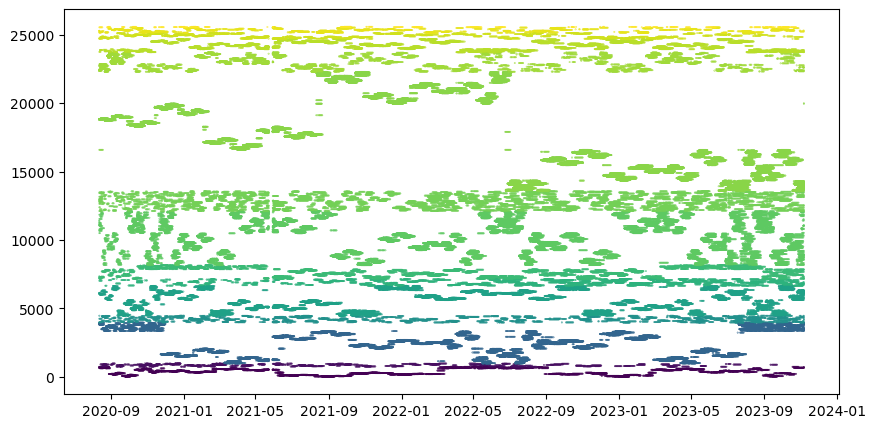

In [68]:
from datetime import datetime
from tqdm import tqdm

X = []
# X_title = []
Y = []
C = []

for i in tqdm(range(len(tmp))):
    for date in tmp.iloc[i]['trending_date_list']:
        X.append(i)
        # X_title.append(tmp.iloc[i]['title'])
        Y.append(datetime.strptime(date, "%Y-%m-%d"))
        C.append(tmp.iloc[i]['categoryId'])
        
plt.figure(figsize = (10, 5))
plt.scatter(Y, X, c = C, s = 0.1)
plt.show()

In [70]:
from collections import Counter

counter = Counter(C)

print(counter)

Counter({24: 79386, 22: 38643, 10: 27231, 17: 17812, 23: 14852, 26: 10194, 25: 9717, 20: 8992, 1: 6515, 19: 5543, 15: 4878, 27: 3872, 28: 3552, 2: 2141, 29: 426})


In [85]:
new_counter = {category_mapping[key]: value for key, value in counter.items() if key in category_mapping}

new_counter['Nonprofits & Activism'] = 426

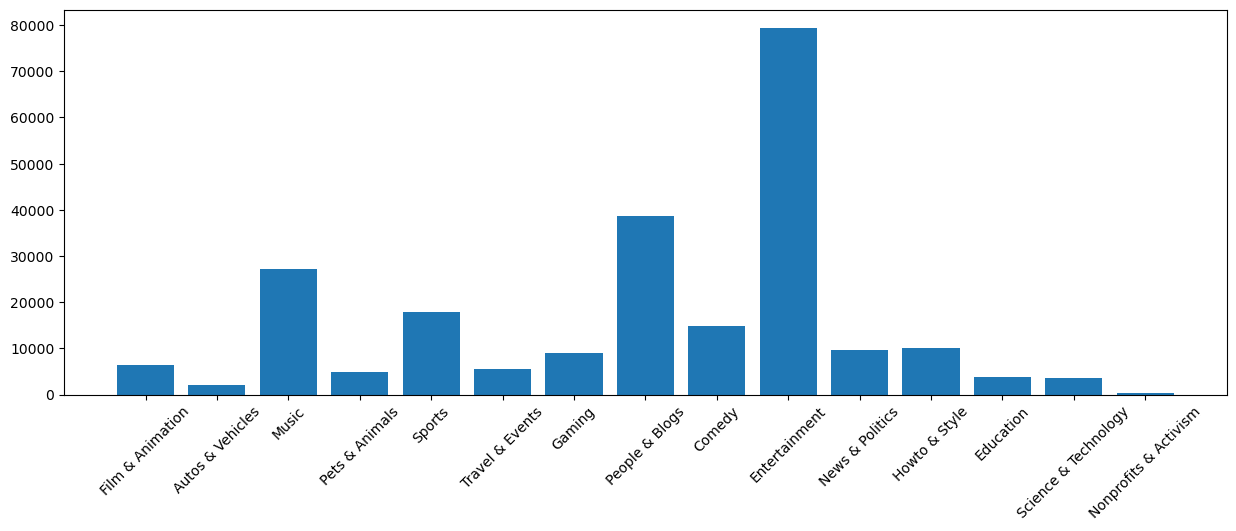

In [93]:
keys = new_counter.keys()
values = new_counter.values()


plt.figure(figsize = (15, 5))
plt.bar(keys, values)
plt.xticks(rotation = 45)
plt.show()

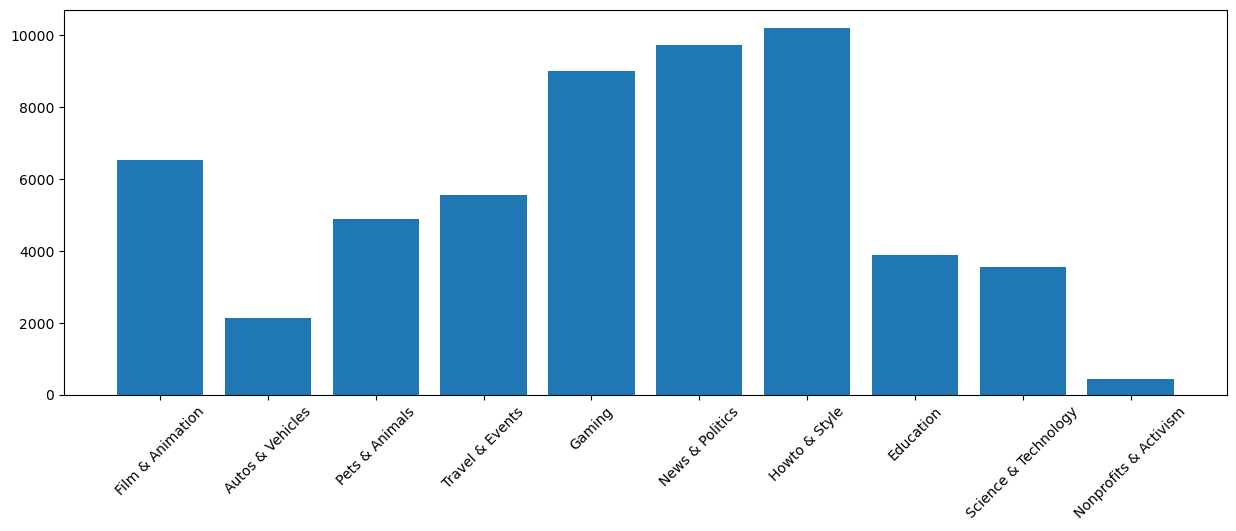

In [94]:
del new_counter['Entertainment']
del new_counter['People & Blogs']
del new_counter['Music']
del new_counter['Sports']
del new_counter['Comedy']

keys = new_counter.keys()
values = new_counter.values()


plt.figure(figsize = (15, 5))
plt.bar(keys, values)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
X = []
X_title = []
Y = []
C = []

for i in range(len(tmp)):
    for date in tmp.loc[i]['trending_date_list']:
        X.append(i)
        X_title.append(tmp.loc[i]['title'])
        Y.append(datetime.strptime(date, "%Y-%m-%d"))
        C.append(tmp.loc[i]['categoryId'])
        
plt.scatter(X, Y, c = C, s = 0.1)
plt.show()

In [41]:
tmp.loc[0]['trending_date_list']

['2020-08-12',
 '2020-08-13',
 '2020-08-14',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18']

In [46]:
tmp['categoryId'].unique()

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype=int64)

In [115]:
category_mapping[29] = 'Nonprofits & Activism'

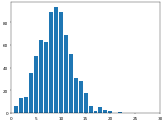

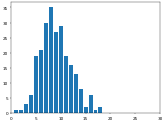

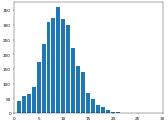

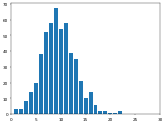

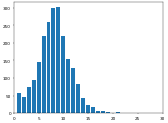

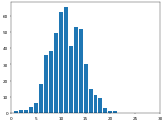

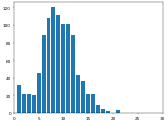

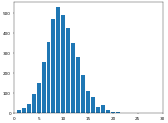

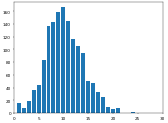

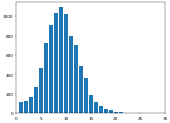

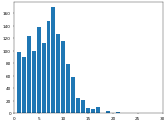

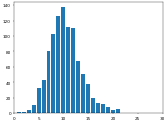

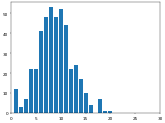

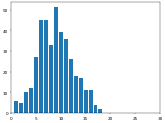

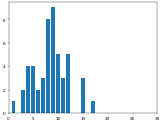

In [64]:
from collections import Counter

for cid in tmp['categoryId'].unique():
    ctmp = tmp[tmp['categoryId'] == cid]
    X = []
    for x in ctmp['trending_date_list']:
        X.append(len(x))
    Xcnt = Counter(X)
    XX = list(Xcnt.keys())
    YY = list(Xcnt.values())
    
    plt.figure(dpi=30) 
    plt.xlim([0, 30])
    plt.bar(XX, YY)
    plt.show()
    

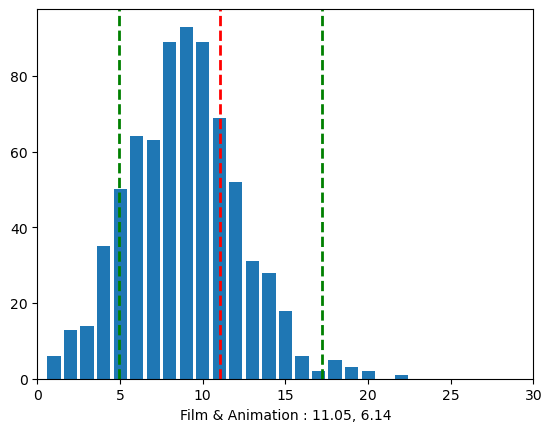

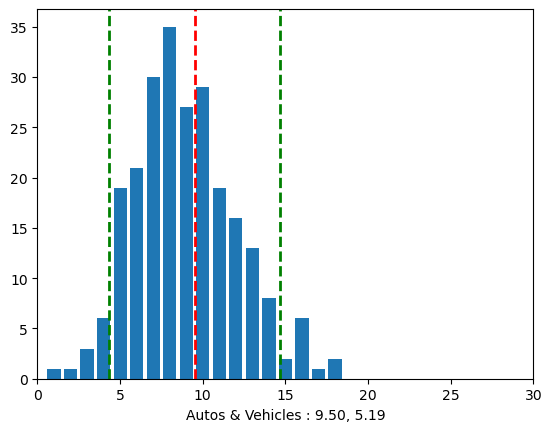

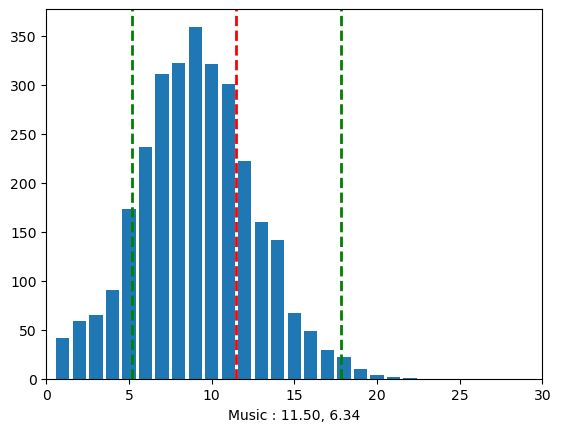

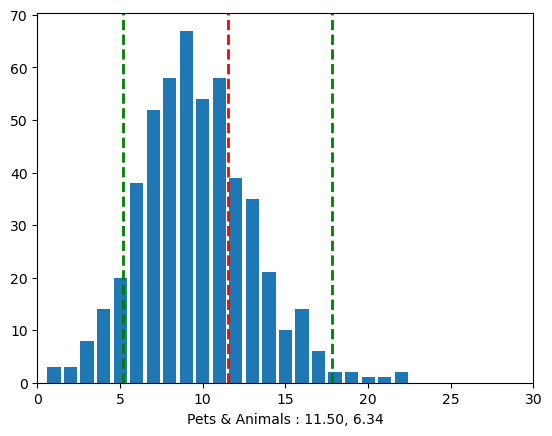

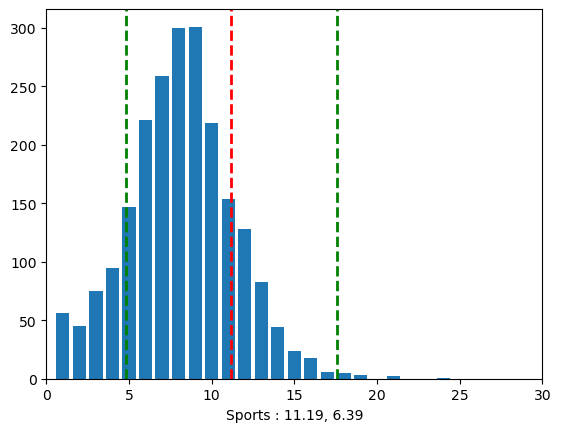

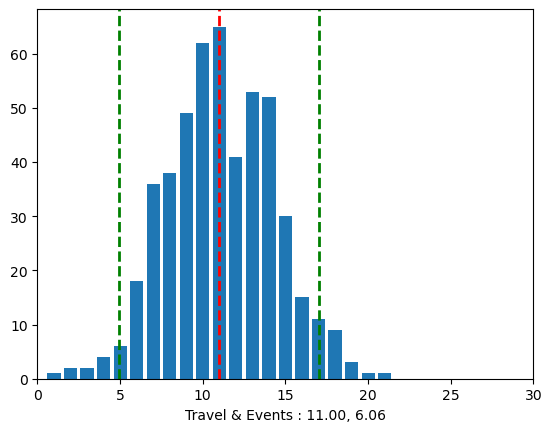

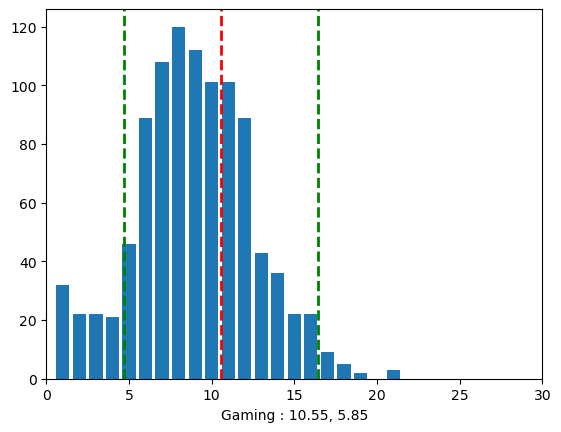

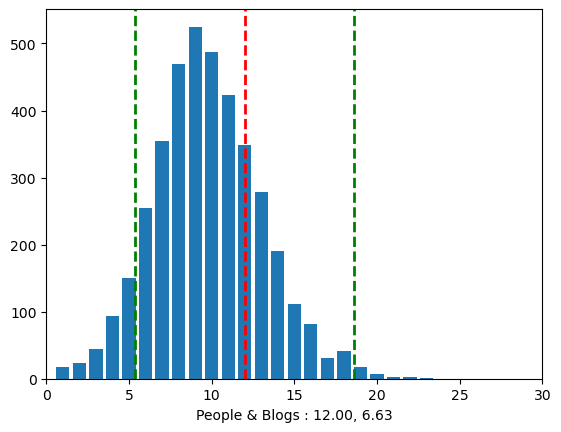

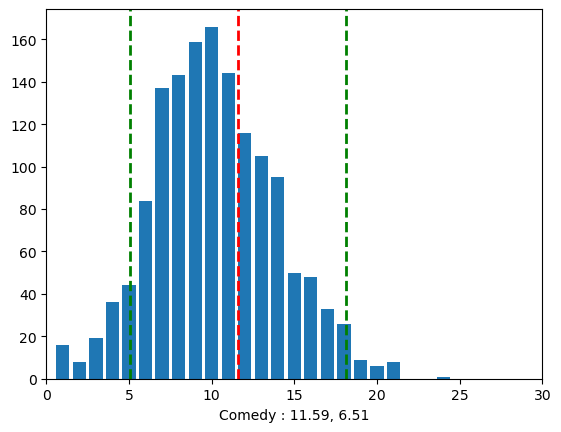

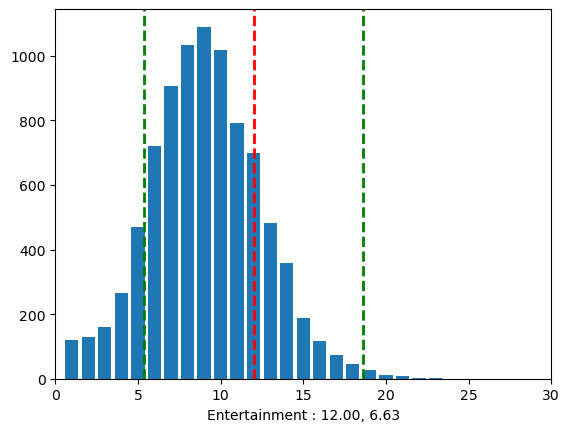

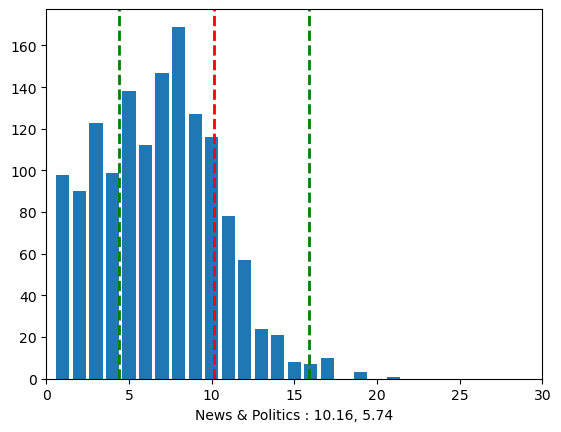

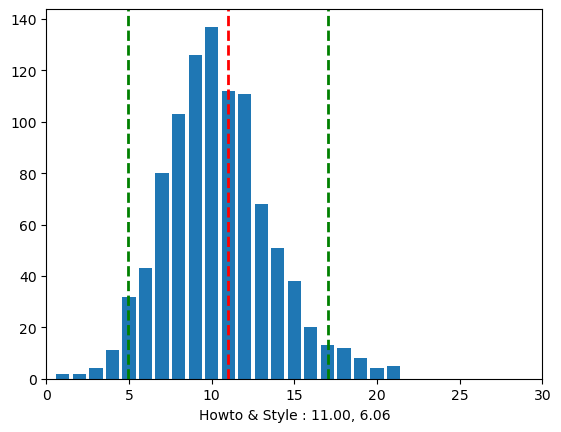

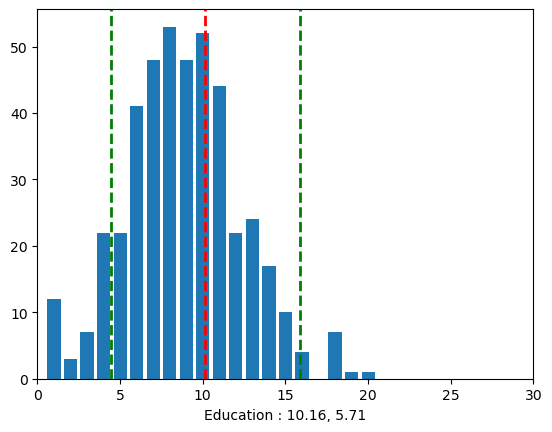

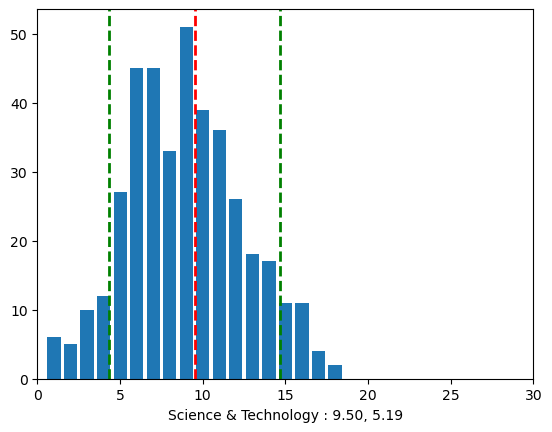

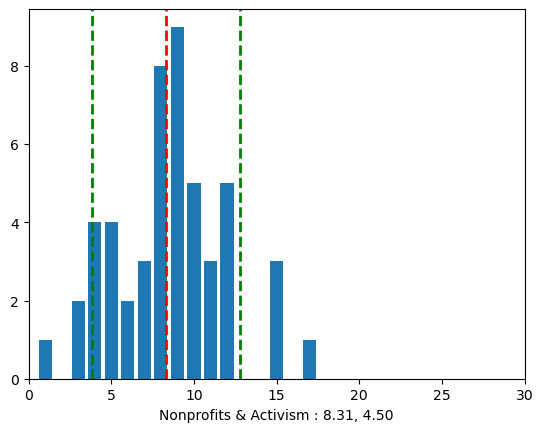

In [121]:
import numpy as np

for cid in tmp['categoryId'].unique():
    ctmp = tmp[tmp['categoryId'] == cid]
    X = []
    for x in ctmp['trending_date_list']:
        X.append(len(x))
    Xcnt = Counter(X)
    XX = list(Xcnt.keys())
    YY = list(Xcnt.values())
    
    mean = np.mean(XX)
    variance = np.std(XX)
    
    plt.figure(dpi=100) 
    plt.xlim([0, 30])
    plt.bar(XX, YY)
    # print(f"{category_mapping[cid]} : {mean}, {variance}")
    # ÌèâÍ∑†
    plt.axvline(mean, color = 'r', linestyle = 'dashed', linewidth = 2)
    
    # ÌëúÏ§ÄÌé∏Ï∞®
    plt.axvline(mean - variance, color = 'g', linestyle = 'dashed', linewidth = 2)
    plt.axvline(mean + variance, color = 'g', linestyle = 'dashed', linewidth = 2)
    
    # Ï†úÎ™© Ïπ¥ÌÖåÍ≥†Î¶¨Î™Ö : ÌèâÍ∑†, Î∂ÑÏÇ∞
    plt.xlabel(f"{category_mapping[cid]} : {mean:.2f}, {variance:.2f}")
    
    plt.savefig(f'{category_mapping[cid]}.png')
    plt.show()
    plt.close()
    